In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

seed=42

In [2]:
df = pd.read_csv('./CourseResources/FINAL_TF2_FILES/TF_2_Notebooks_and_Data/DATA/cancer_classification.csv')

In [3]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
len(df)

569

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

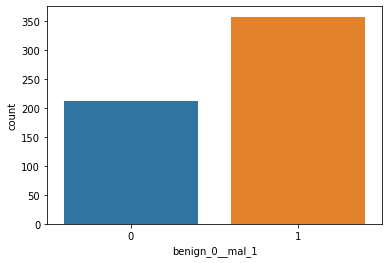

In [9]:
sns.countplot('benign_0__mal_1', data=df)

In [23]:
df.corr()['benign_0__mal_1']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

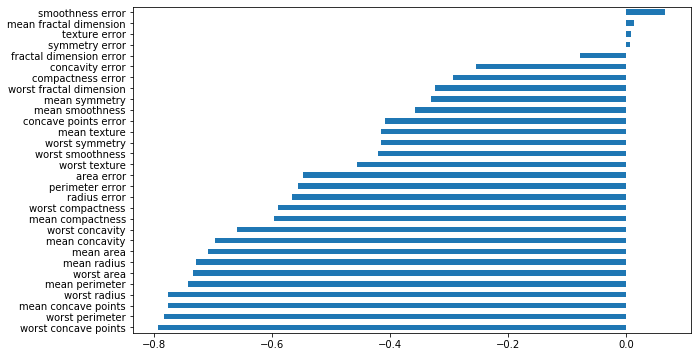

In [24]:
plt.figure(figsize=(10,6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='barh')

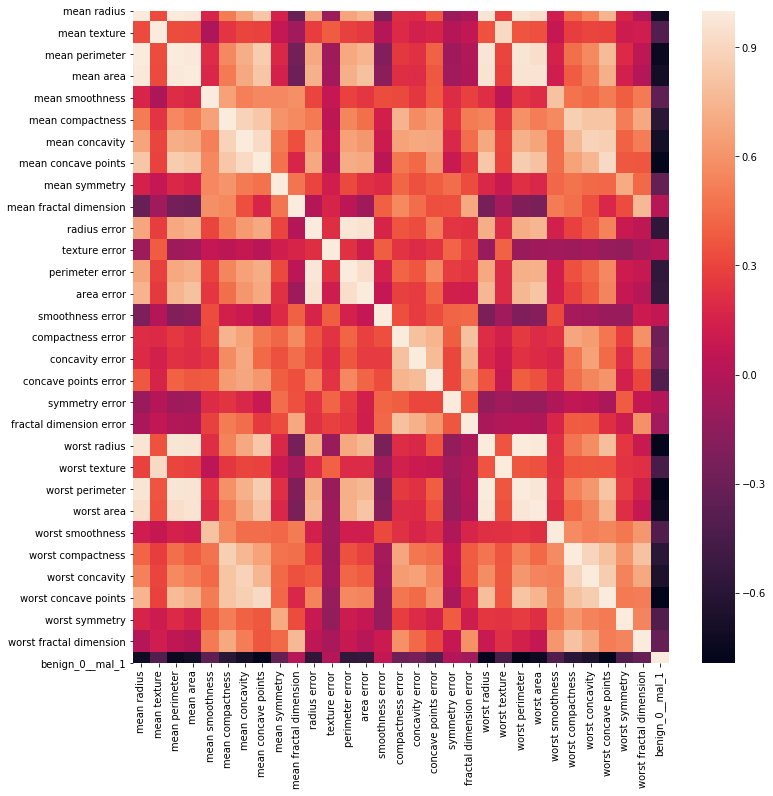

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [29]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [30]:
X.shape, y.shape

((569, 30), (569,))

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [35]:
X_train = scaler.fit_transform(X_train)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [37]:
X_test = scaler.transform(X_test)

In [39]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [41]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION will use Sigmoid in final layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [44]:
model.fit(X_train, y_train, epochs= 600, validation_data = (X_test, y_test), batch_size=64)

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 0s 139us/sample - loss: 0.6619 - val_loss: 0.6502
Epoch 2/600
398/398 [==============================] - 0s 30us/sample - loss: 0.6478 - val_loss: 0.6354
Epoch 3/600
398/398 [==============================] - 0s 28us/sample - loss: 0.6340 - val_loss: 0.6205
Epoch 4/600
398/398 [==============================] - 0s 30us/sample - loss: 0.6204 - val_loss: 0.6046
Epoch 5/600
398/398 [==============================] - 0s 30us/sample - loss: 0.6052 - val_loss: 0.5872
Epoch 6/600
398/398 [==============================] - 0s 30us/sample - loss: 0.5887 - val_loss: 0.5687
Epoch 7/600
398/398 [==============================] - 0s 29us/sample - loss: 0.5722 - val_loss: 0.5495
Epoch 8/600
398/398 [==============================] - 0s 33us/sample - loss: 0.5539 - val_loss: 0.5288
Epoch 9/600
398/398 [==============================] - 0s 33us/sample - loss: 0.5342 - val_loss: 0.5074
Epoch 10/600
398/

398/398 [==============================] - 0s 33us/sample - loss: 0.0831 - val_loss: 0.0685
Epoch 79/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0832 - val_loss: 0.0680
Epoch 80/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0801 - val_loss: 0.0684
Epoch 81/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0785 - val_loss: 0.0690
Epoch 82/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0783 - val_loss: 0.0674
Epoch 83/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0774 - val_loss: 0.0658
Epoch 84/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0770 - val_loss: 0.0658
Epoch 85/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0758 - val_loss: 0.0650
Epoch 86/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0752 - val_loss: 0.0641
Epoch 87/600
398/398 [==============================] - 0s 30us/samp

398/398 [==============================] - 0s 28us/sample - loss: 0.0560 - val_loss: 0.0498
Epoch 156/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0532 - val_loss: 0.0520
Epoch 157/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0536 - val_loss: 0.0505
Epoch 158/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0534 - val_loss: 0.0498
Epoch 159/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0524 - val_loss: 0.0522
Epoch 160/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0530 - val_loss: 0.0510
Epoch 161/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0526 - val_loss: 0.0501
Epoch 162/600
398/398 [==============================] - 0s 25us/sample - loss: 0.0528 - val_loss: 0.0507
Epoch 163/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0531 - val_loss: 0.0515
Epoch 164/600
398/398 [==============================] - 0s 

398/398 [==============================] - 0s 30us/sample - loss: 0.0475 - val_loss: 0.0485
Epoch 233/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0481 - val_loss: 0.0602
Epoch 234/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0458 - val_loss: 0.0470
Epoch 235/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0519 - val_loss: 0.0477
Epoch 236/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0470 - val_loss: 0.0721
Epoch 237/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0551 - val_loss: 0.0488
Epoch 238/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0467 - val_loss: 0.0470
Epoch 239/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0463 - val_loss: 0.0568
Epoch 240/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0451 - val_loss: 0.0490
Epoch 241/600
398/398 [==============================] - 0s 

398/398 [==============================] - 0s 28us/sample - loss: 0.0371 - val_loss: 0.0486
Epoch 310/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0390 - val_loss: 0.0503
Epoch 311/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0370 - val_loss: 0.0487
Epoch 312/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0375 - val_loss: 0.0488
Epoch 313/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0372 - val_loss: 0.0496
Epoch 314/600
398/398 [==============================] - 0s 25us/sample - loss: 0.0374 - val_loss: 0.0501
Epoch 315/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0370 - val_loss: 0.0491
Epoch 316/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0372 - val_loss: 0.0496
Epoch 317/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0369 - val_loss: 0.0493
Epoch 318/600
398/398 [==============================] - 0s 

398/398 [==============================] - 0s 25us/sample - loss: 0.0312 - val_loss: 0.0513
Epoch 387/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0306 - val_loss: 0.0498
Epoch 388/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0318 - val_loss: 0.0502
Epoch 389/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0305 - val_loss: 0.0523
Epoch 390/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0328 - val_loss: 0.0540
Epoch 391/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0314 - val_loss: 0.0499
Epoch 392/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0307 - val_loss: 0.0511
Epoch 393/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0306 - val_loss: 0.0517
Epoch 394/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0309 - val_loss: 0.0514
Epoch 395/600
398/398 [==============================] - 0s 

398/398 [==============================] - 0s 28us/sample - loss: 0.0262 - val_loss: 0.0536
Epoch 464/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0258 - val_loss: 0.0591
Epoch 465/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0268 - val_loss: 0.0533
Epoch 466/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0256 - val_loss: 0.0516
Epoch 467/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0259 - val_loss: 0.0534
Epoch 468/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0309 - val_loss: 0.0651
Epoch 469/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0268 - val_loss: 0.0519
Epoch 470/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0263 - val_loss: 0.0547
Epoch 471/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0269 - val_loss: 0.0552
Epoch 472/600
398/398 [==============================] - 0s 

398/398 [==============================] - 0s 28us/sample - loss: 0.0211 - val_loss: 0.0568
Epoch 541/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0211 - val_loss: 0.0610
Epoch 542/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0216 - val_loss: 0.0576
Epoch 543/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0210 - val_loss: 0.0591
Epoch 544/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0242 - val_loss: 0.0584
Epoch 545/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0236 - val_loss: 0.0732
Epoch 546/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0228 - val_loss: 0.0617
Epoch 547/600
398/398 [==============================] - 0s 25us/sample - loss: 0.0216 - val_loss: 0.0595
Epoch 548/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0209 - val_loss: 0.0627
Epoch 549/600
398/398 [==============================] - 0s 

In [45]:
losses = pd.DataFrame(model.history.history)

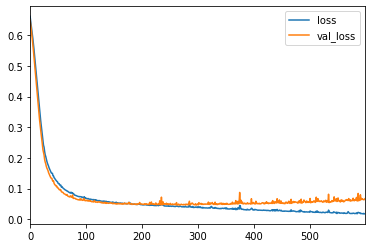

In [50]:
losses.plot() # As train loss is getting lower and lower but not validation loss.
# This is clear sign of overfitting, we need to use EarlyStop here

# Preventing Overfitting

In [51]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION will use Sigmoid in final layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
# help(EarlyStopping)

In [57]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience= 25)

In [58]:
model.fit(X_train, y_train, epochs= 600, validation_data = (X_test, y_test), batch_size=64, callbacks=[early_stop])

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 0s 1ms/sample - loss: 0.7106 - val_loss: 0.6931
Epoch 2/600
398/398 [==============================] - 0s 30us/sample - loss: 0.6805 - val_loss: 0.6676
Epoch 3/600
398/398 [==============================] - 0s 33us/sample - loss: 0.6602 - val_loss: 0.6462
Epoch 4/600
398/398 [==============================] - 0s 30us/sample - loss: 0.6407 - val_loss: 0.6242
Epoch 5/600
398/398 [==============================] - 0s 30us/sample - loss: 0.6203 - val_loss: 0.6010
Epoch 6/600
398/398 [==============================] - 0s 30us/sample - loss: 0.6001 - val_loss: 0.5788
Epoch 7/600
398/398 [==============================] - 0s 30us/sample - loss: 0.5803 - val_loss: 0.5557
Epoch 8/600
398/398 [==============================] - 0s 28us/sample - loss: 0.5590 - val_loss: 0.5317
Epoch 9/600
398/398 [==============================] - 0s 30us/sample - loss: 0.5354 - val_loss: 0.5028
Epoch 10/600
398/39

398/398 [==============================] - 0s 33us/sample - loss: 0.0708 - val_loss: 0.0645
Epoch 79/600
398/398 [==============================] - 0s 33us/sample - loss: 0.0713 - val_loss: 0.0650
Epoch 80/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0699 - val_loss: 0.0653
Epoch 81/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0689 - val_loss: 0.0634
Epoch 82/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0694 - val_loss: 0.0628
Epoch 83/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0684 - val_loss: 0.0643
Epoch 84/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0680 - val_loss: 0.0627
Epoch 85/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0669 - val_loss: 0.0619
Epoch 86/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0667 - val_loss: 0.0627
Epoch 87/600
398/398 [==============================] - 0s 28us/samp

398/398 [==============================] - 0s 25us/sample - loss: 0.0455 - val_loss: 0.0523
Epoch 156/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0446 - val_loss: 0.0512
Epoch 157/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0445 - val_loss: 0.0507
Epoch 158/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0448 - val_loss: 0.0518
Epoch 159/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0454 - val_loss: 0.0578
Epoch 160/600
398/398 [==============================] - 0s 33us/sample - loss: 0.0446 - val_loss: 0.0511
Epoch 161/600
398/398 [==============================] - 0s 33us/sample - loss: 0.0466 - val_loss: 0.0506
Epoch 162/600
398/398 [==============================] - 0s 34us/sample - loss: 0.0437 - val_loss: 0.0549
Epoch 163/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0441 - val_loss: 0.0505
Epoch 164/600
398/398 [==============================] - 0s 

In [59]:
losses = pd.DataFrame(model.history.history)

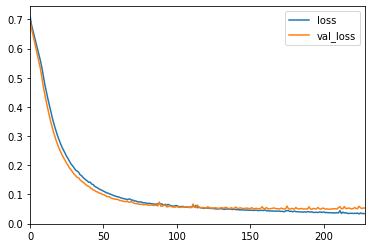

In [60]:
losses.plot()

# 2. Add DropOut layer

In [61]:
from tensorflow.keras.layers import Dropout

In [62]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5)) # Half the neurons in each batch, in this layer(prev one) of 30 will be turned off

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION will use Sigmoid in final layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [63]:
model.fit(X_train, y_train, epochs= 600, validation_data = (X_test, y_test), batch_size=64, callbacks=[early_stop])

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 0s 809us/sample - loss: 0.7162 - val_loss: 0.7024
Epoch 2/600
398/398 [==============================] - 0s 35us/sample - loss: 0.7067 - val_loss: 0.6855
Epoch 3/600
398/398 [==============================] - 0s 33us/sample - loss: 0.6865 - val_loss: 0.6728
Epoch 4/600
398/398 [==============================] - 0s 30us/sample - loss: 0.6925 - val_loss: 0.6621
Epoch 5/600
398/398 [==============================] - 0s 35us/sample - loss: 0.6672 - val_loss: 0.6515
Epoch 6/600
398/398 [==============================] - 0s 33us/sample - loss: 0.6692 - val_loss: 0.6404
Epoch 7/600
398/398 [==============================] - 0s 30us/sample - loss: 0.6451 - val_loss: 0.6295
Epoch 8/600
398/398 [==============================] - 0s 33us/sample - loss: 0.6402 - val_loss: 0.6173
Epoch 9/600
398/398 [==============================] - 0s 30us/sample - loss: 0.6253 - val_loss: 0.6040
Epoch 10/600
398/

398/398 [==============================] - 0s 30us/sample - loss: 0.1743 - val_loss: 0.1085
Epoch 79/600
398/398 [==============================] - 0s 30us/sample - loss: 0.2129 - val_loss: 0.1068
Epoch 80/600
398/398 [==============================] - 0s 30us/sample - loss: 0.1738 - val_loss: 0.1063
Epoch 81/600
398/398 [==============================] - 0s 30us/sample - loss: 0.1685 - val_loss: 0.1077
Epoch 82/600
398/398 [==============================] - 0s 30us/sample - loss: 0.1612 - val_loss: 0.1050
Epoch 83/600
398/398 [==============================] - 0s 30us/sample - loss: 0.1974 - val_loss: 0.1016
Epoch 84/600
398/398 [==============================] - 0s 30us/sample - loss: 0.1480 - val_loss: 0.0991
Epoch 85/600
398/398 [==============================] - 0s 30us/sample - loss: 0.1997 - val_loss: 0.0969
Epoch 86/600
398/398 [==============================] - 0s 30us/sample - loss: 0.1973 - val_loss: 0.0956
Epoch 87/600
398/398 [==============================] - 0s 28us/samp

398/398 [==============================] - 0s 28us/sample - loss: 0.1322 - val_loss: 0.0559
Epoch 156/600
398/398 [==============================] - 0s 28us/sample - loss: 0.1173 - val_loss: 0.0570
Epoch 157/600
398/398 [==============================] - 0s 28us/sample - loss: 0.1088 - val_loss: 0.0587
Epoch 158/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0844 - val_loss: 0.0582
Epoch 159/600
398/398 [==============================] - 0s 30us/sample - loss: 0.1052 - val_loss: 0.0563
Epoch 160/600
398/398 [==============================] - 0s 30us/sample - loss: 0.1251 - val_loss: 0.0562
Epoch 161/600
398/398 [==============================] - 0s 28us/sample - loss: 0.1023 - val_loss: 0.0582
Epoch 162/600
398/398 [==============================] - 0s 33us/sample - loss: 0.1228 - val_loss: 0.0588
Epoch 163/600
398/398 [==============================] - 0s 30us/sample - loss: 0.1069 - val_loss: 0.0596
Epoch 164/600
398/398 [==============================] - 0s 

398/398 [==============================] - 0s 33us/sample - loss: 0.0823 - val_loss: 0.0507
Epoch 233/600
398/398 [==============================] - 0s 32us/sample - loss: 0.0980 - val_loss: 0.0526
Epoch 234/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0795 - val_loss: 0.0542
Epoch 235/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0794 - val_loss: 0.0549
Epoch 236/600
398/398 [==============================] - 0s 28us/sample - loss: 0.1069 - val_loss: 0.0527
Epoch 237/600
398/398 [==============================] - 0s 28us/sample - loss: 0.0848 - val_loss: 0.0512
Epoch 238/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0709 - val_loss: 0.0506
Epoch 239/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0764 - val_loss: 0.0510
Epoch 240/600
398/398 [==============================] - 0s 30us/sample - loss: 0.0820 - val_loss: 0.0517
Epoch 241/600
398/398 [==============================] - 0s 

In [64]:
losses = pd.DataFrame(model.history.history)

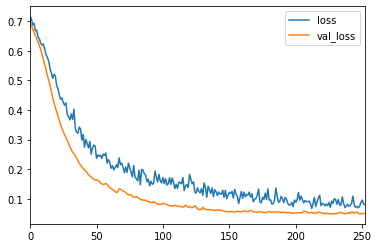

In [65]:
losses.plot()

In [66]:
predictions = model.predict_classes(X_test)

In [67]:
predictions

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [68]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [73]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [74]:
print(confusion_matrix(y_test, predictions))

[[ 62   1]
 [  1 107]]


In [75]:
accuracy_score(y_test, predictions) # Accuracy is a good matrix here, because the classes were adequately balanced.

0.9883040935672515

In [76]:
f1_score(y_test,predictions)

0.9907407407407407